<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#testing-dummified-and-label-encoded-dfs-with-t-distributed-Stochastic-Neighbor-Embedding" data-toc-modified-id="testing-dummified-and-label-encoded-dfs-with-t-distributed-Stochastic-Neighbor-Embedding-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>testing dummified and label encoded dfs with t-distributed Stochastic Neighbor Embedding</a></span><ul class="toc-item"><li><span><a href="#Dummified-data" data-toc-modified-id="Dummified-data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Dummified data</a></span></li><li><span><a href="#Label-encoded-data" data-toc-modified-id="Label-encoded-data-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Label encoded data</a></span></li><li><span><a href="#t-DNSE-with-Dummified-vs-Label-Encoded-data-are-highly-similar,-continue-below-with-Label-Encoded-data" data-toc-modified-id="t-DNSE-with-Dummified-vs-Label-Encoded-data-are-highly-similar,-continue-below-with-Label-Encoded-data-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>t-DNSE with Dummified vs Label Encoded data are highly similar, continue below with Label Encoded data</a></span></li></ul></li><li><span><a href="#PCA" data-toc-modified-id="PCA-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>PCA</a></span></li><li><span><a href="#Repeat-t-distributed-Stochastic-Neighbor-Embedding-using-PCA-output-top-3-components" data-toc-modified-id="Repeat-t-distributed-Stochastic-Neighbor-Embedding-using-PCA-output-top-3-components-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Repeat t-distributed Stochastic Neighbor Embedding using PCA output top 3 components</a></span></li><li><span><a href="#K-means-clustering" data-toc-modified-id="K-means-clustering-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>K-means clustering</a></span><ul class="toc-item"><li><span><a href="#MORE-EDA:-plot-actual-data-with-Potential-Fraud-labeling" data-toc-modified-id="MORE-EDA:-plot-actual-data-with-Potential-Fraud-labeling-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>MORE EDA: plot actual data with Potential Fraud labeling</a></span><ul class="toc-item"><li><span><a href="#should-be-2-clusters..." data-toc-modified-id="should-be-2-clusters...-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>should be 2 clusters...</a></span></li><li><span><a href="#2-clusters" data-toc-modified-id="2-clusters-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>2 clusters</a></span></li></ul></li></ul></li><li><span><a href="#Repeat-K-Means-clustering-using-PCA-output-top-3-components" data-toc-modified-id="Repeat-K-Means-clustering-using-PCA-output-top-3-components-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Repeat K-Means clustering using PCA output top 3 components</a></span><ul class="toc-item"><li><span><a href="#Nearly-same-result-with-PCA-as-without" data-toc-modified-id="Nearly-same-result-with-PCA-as-without-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Nearly same result with PCA as without</a></span></li></ul></li><li><span><a href="#Hierarchical-Clustering" data-toc-modified-id="Hierarchical-Clustering-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Hierarchical Clustering</a></span></li><li><span><a href="#Density-Based-Clustering-(DBSCAN)-....-performs-poorly-does-not-identify-2-clusters" data-toc-modified-id="Density-Based-Clustering-(DBSCAN)-....-performs-poorly-does-not-identify-2-clusters-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Density Based Clustering (DBSCAN) .... performs poorly does not identify 2 clusters</a></span></li><li><span><a href="#Gaussian-Mixture-with-soft-labeling" data-toc-modified-id="Gaussian-Mixture-with-soft-labeling-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Gaussian Mixture with soft labeling</a></span></li><li><span><a href="#One-Class-SVM" data-toc-modified-id="One-Class-SVM-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>One Class SVM</a></span></li></ul></div>

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)
sns.set(style = "whitegrid")
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
size=15
params = {'legend.fontsize': 'large',
          'figure.figsize': (20,8),
          'axes.labelsize': size*1.1,
          'axes.titlesize': size*2,
          'xtick.labelsize': size*1.1,
          'ytick.labelsize': size*1.1,
          'axes.titlepad': 25,
          'figure.titlesize': size*2,
          'legend.fontsize': size,
            'legend.title_fontsize': size*1.1
         }

plt.rcParams.update(params)

sns.set_style("whitegrid")

In [3]:
# load binaries
trIeng_df_dum = pd.read_pickle("./data/trIeng_df_dum.pkl")
trIeng_df_undum = pd.read_pickle("./data/trIeng_df_undum.pkl")

# testing dummified and label encoded dfs with t-distributed Stochastic Neighbor Embedding

In [4]:
# dummified version
y_b= trIeng_df_dum['PotentialFraud']
X=trIeng_df_dum.drop('PotentialFraud', axis=1)

In [5]:
# undummified label encoded version
y_le= trIeng_df_undum['PotentialFraud']
X_le=trIeng_df_undum.drop('PotentialFraud', axis=1)

## Dummified data

In [113]:
tsne = TSNE(n_components=2, random_state=42, n_jobs=-1, verbose=4, perplexity=100) #perplexity tries: 30, 10,5,1,50,75,100
Xtsne = tsne.fit_transform(X)

[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 2092 samples in 2.743s...
[t-SNE] Computed neighbors for 2092 samples in 22.090s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2092
[t-SNE] Computed conditional probabilities for sample 2000 / 2092
[t-SNE] Computed conditional probabilities for sample 2092 / 2092
[t-SNE] Mean sigma: 1999.580393
[t-SNE] Computed conditional probabilities in 1.686s
[t-SNE] Iteration 50: error = 58.5662994, gradient norm = 0.0903825 (50 iterations in 2.524s)
[t-SNE] Iteration 100: error = 52.0459518, gradient norm = 0.0220820 (50 iterations in 2.356s)
[t-SNE] Iteration 150: error = 51.2922249, gradient norm = 0.0118499 (50 iterations in 2.300s)
[t-SNE] Iteration 200: error = 51.0518723, gradient norm = 0.0106555 (50 iterations in 2.358s)
[t-SNE] Iteration 250: error = 50.9480858, gradient norm = 0.0231691 (50 iterations in 2.903s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.948086
[t-SNE] Iteration 300:

Text(0.5, 1.0, 't-Distributed Stochastic Neighbor Embedding, Dummified Data')

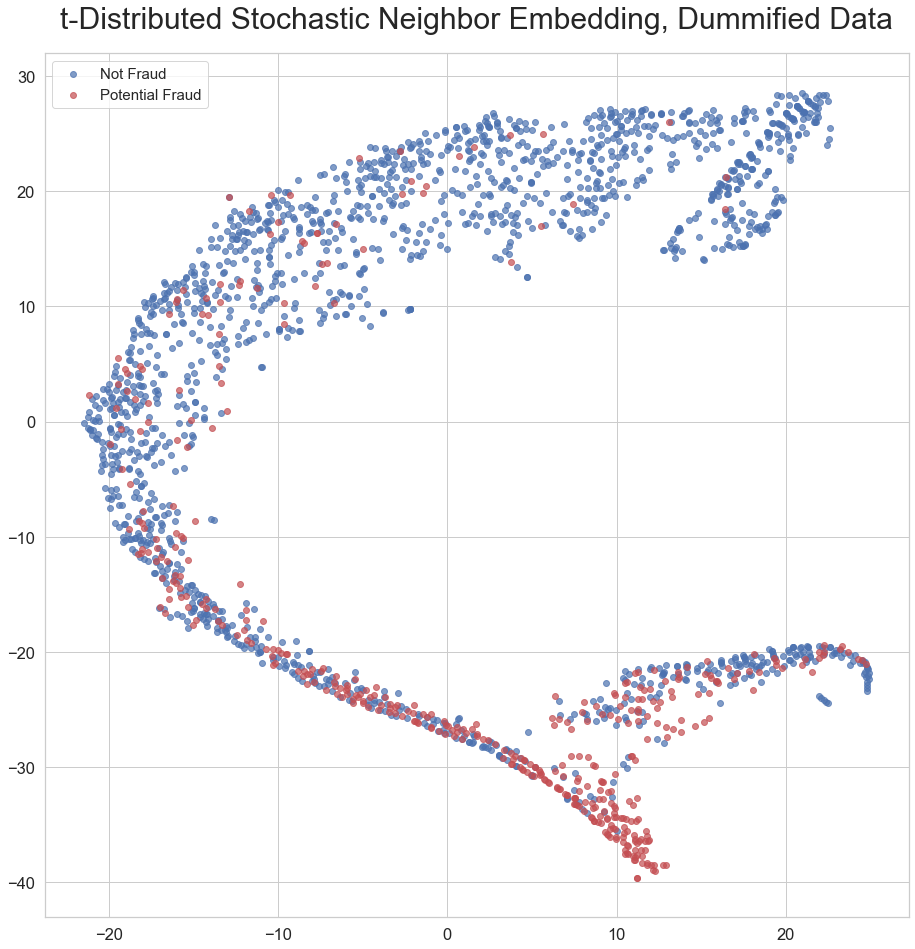

In [114]:
# scatterplot
fig = plt.figure(figsize=(12, 12))
ax = fig.add_axes([0, 0, 1, 1])
ax.scatter(Xtsne[np.where(y_b.values == 0), 0], Xtsne[np.where(y_b.values == 0), 1],
           marker='o', color='b', linewidth=1, alpha=0.7, label='Not Fraud')
ax.scatter(Xtsne[np.where(y_b.values == 1), 0], Xtsne[np.where(y_b.values == 1), 1],
           marker='o', color='r', linewidth=1, alpha=0.7, label='Potential Fraud')
ax.legend(loc='best')
plt.title('t-Distributed Stochastic Neighbor Embedding, Dummified Data')

## Label encoded data

In [110]:
tsne = TSNE(n_components=2, random_state=42, n_jobs=-1, verbose=4, perplexity=100) #perplexity tries: 30, 10,5,1,50,75,100
Xtsne = tsne.fit_transform(X_le)

[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 2092 samples in 0.015s...
[t-SNE] Computed neighbors for 2092 samples in 0.333s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2092
[t-SNE] Computed conditional probabilities for sample 2000 / 2092
[t-SNE] Computed conditional probabilities for sample 2092 / 2092
[t-SNE] Mean sigma: 2601.601238
[t-SNE] Computed conditional probabilities in 1.757s
[t-SNE] Iteration 50: error = 57.9334908, gradient norm = 0.0723721 (50 iterations in 2.794s)
[t-SNE] Iteration 100: error = 52.2589417, gradient norm = 0.0314242 (50 iterations in 2.310s)
[t-SNE] Iteration 150: error = 51.3993721, gradient norm = 0.0282274 (50 iterations in 2.351s)
[t-SNE] Iteration 200: error = 51.0771713, gradient norm = 0.0050687 (50 iterations in 2.378s)
[t-SNE] Iteration 250: error = 50.9283142, gradient norm = 0.0087697 (50 iterations in 2.790s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.928314
[t-SNE] Iteration 300: 

Text(0.5, 1.0, 't-Distributed Stochastic Neighbor Embedding, Label Encoded Data')

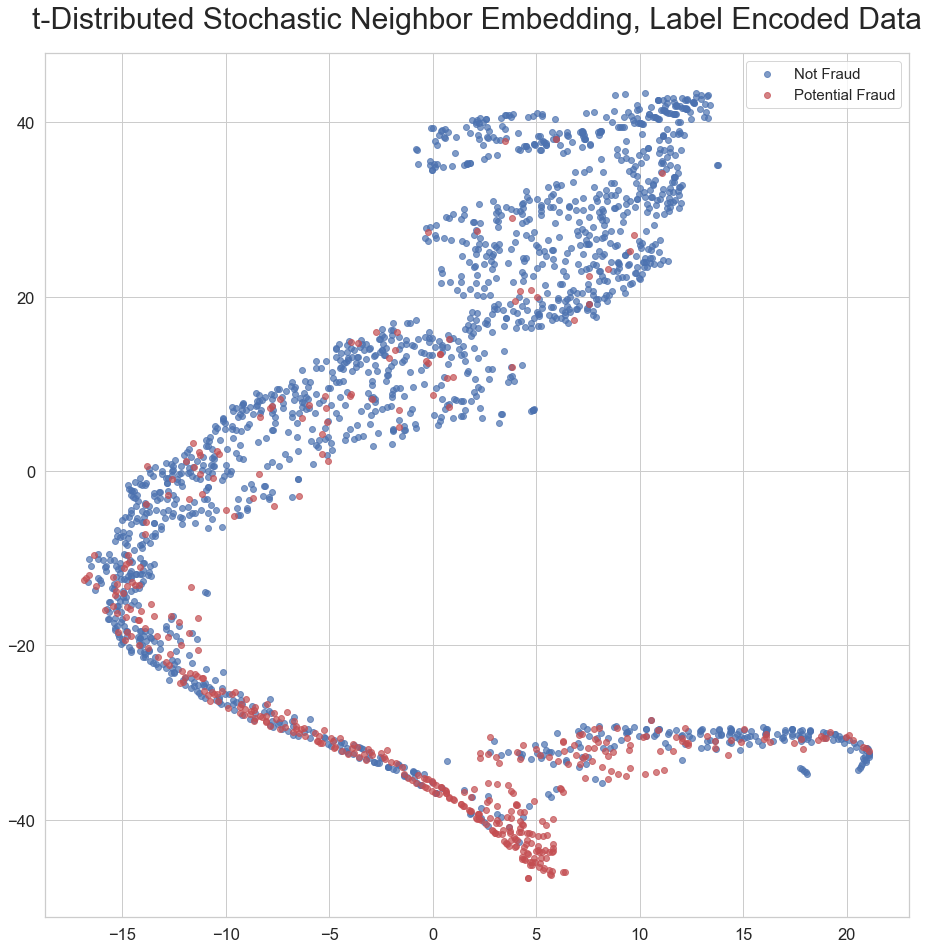

In [112]:
# scatterplot
fig = plt.figure(figsize=(12, 12))
ax = fig.add_axes([0, 0, 1, 1])
ax.scatter(Xtsne[np.where(y_b.values == 0), 0], Xtsne[np.where(y_b.values == 0), 1],
           marker='o', color='b', linewidth=1, alpha=0.7, label='Not Fraud')
ax.scatter(Xtsne[np.where(y_b.values == 1), 0], Xtsne[np.where(y_b.values == 1), 1],
           marker='o', color='r', linewidth=1, alpha=0.7, label='Potential Fraud')
ax.legend(loc='best')
plt.title('t-Distributed Stochastic Neighbor Embedding, Label Encoded Data')

## t-DNSE with Dummified vs Label Encoded data are highly similar, continue below with Label Encoded data

# PCA
Following example from: https://towardsdatascience.com/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b

In [16]:
pca = PCA(n_components=10)
pca_result = pca.fit_transform(X_le)
                                 
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))


AttributeError: 'numpy.ndarray' object has no attribute 'explained_variance_ratio_'

In [12]:
X_le['pca-one'] = pca_result[:,0]
X_le['pca-two'] = pca_result[:,1] 
X_le['pca-three'] = pca_result[:,2]

In [ ]:
# wow, most of the variation of the dataset is in the first three components

Text(0.5, 1.0, 'PCA: Top Two Components')

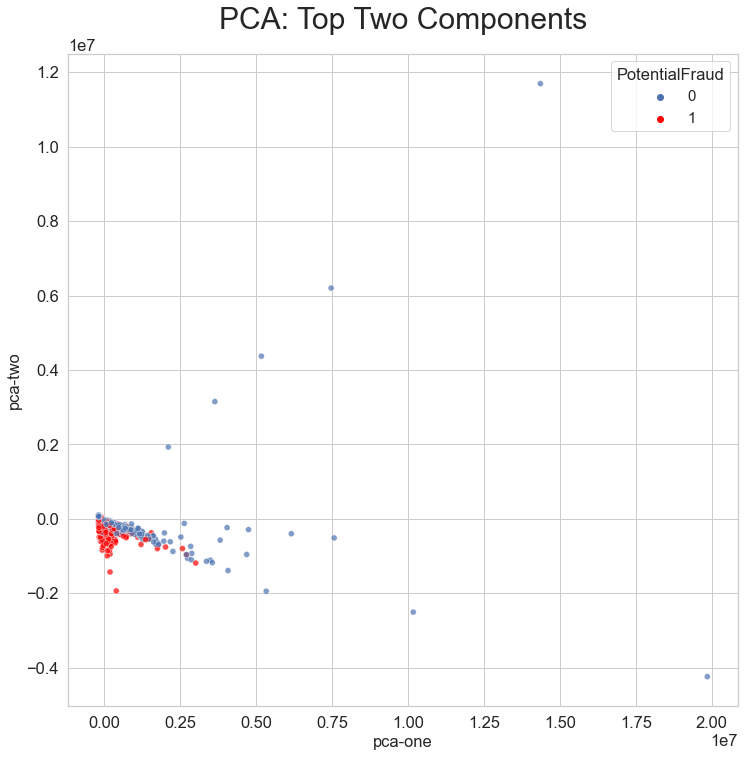

In [44]:
plt.figure(figsize=(12,12))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue=y_le,
    palette=['b','red'],
    #sns.color_palette("hls", 2),
    data=X_le,
    legend="full",
    alpha=0.7
)
plt.title('PCA: Top Two Components')

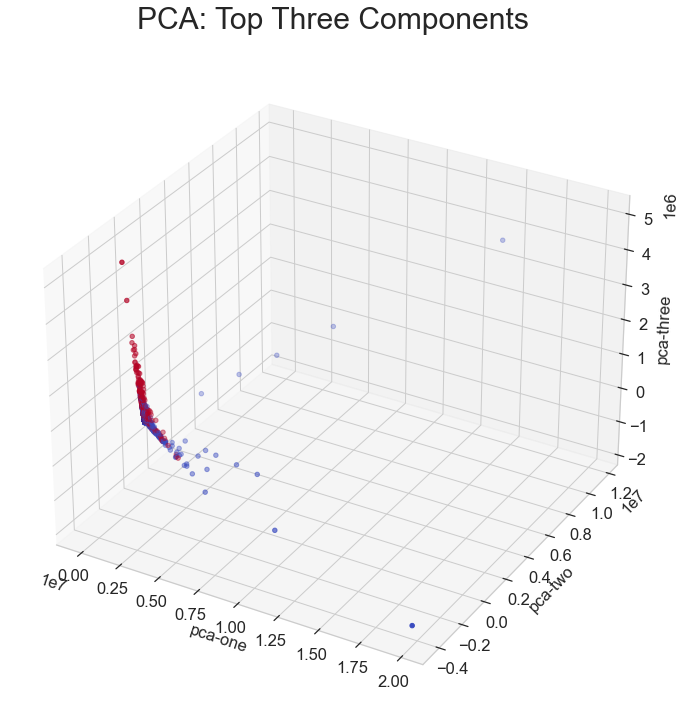

In [46]:
# 3D plotting

ax = plt.figure(figsize=(12,12)).gca(projection='3d')
ax.scatter(
    xs=X_le["pca-one"], 
    ys=X_le["pca-two"], 
    zs=X_le["pca-three"], 
    c=y_le, 
    cmap='coolwarm'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
#plt.legend()
plt.title('PCA: Top Three Components')
plt.show()

# Repeat t-distributed Stochastic Neighbor Embedding using PCA output top 3 components

In [155]:
pca_3 = PCA(n_components=3)
pca_result_3 = pca_3.fit_transform(X_le)
print('Cumulative explained variation for 3 principal components: {}'.format(np.sum(pca_3.explained_variance_ratio_)))

Cumulative explained variation for 3 principal components: 0.9998069401670547


In [95]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=4, perplexity=75, n_iter=1000, random_state=42, n_jobs=-1)
tsne_pca_results = tsne.fit_transform(pca_result_3)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 226 nearest neighbors...
[t-SNE] Indexed 2092 samples in 0.002s...
[t-SNE] Computed neighbors for 2092 samples in 0.101s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2092
[t-SNE] Computed conditional probabilities for sample 2000 / 2092
[t-SNE] Computed conditional probabilities for sample 2092 / 2092
[t-SNE] Mean sigma: 177.232606
[t-SNE] Computed conditional probabilities in 1.243s
[t-SNE] Iteration 50: error = 56.8621101, gradient norm = 0.0721940 (50 iterations in 2.948s)
[t-SNE] Iteration 100: error = 50.1739769, gradient norm = 0.0282019 (50 iterations in 1.742s)
[t-SNE] Iteration 150: error = 49.1398239, gradient norm = 0.0201755 (50 iterations in 1.636s)
[t-SNE] Iteration 200: error = 48.7253914, gradient norm = 0.0129309 (50 iterations in 1.777s)
[t-SNE] Iteration 250: error = 48.4670792, gradient norm = 0.0137744 (50 iterations in 1.707s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 48.467079
[t-SNE] Iteration 300: e

Text(0.5, 1.0, 't-DSNE from PCA Top Three Components')

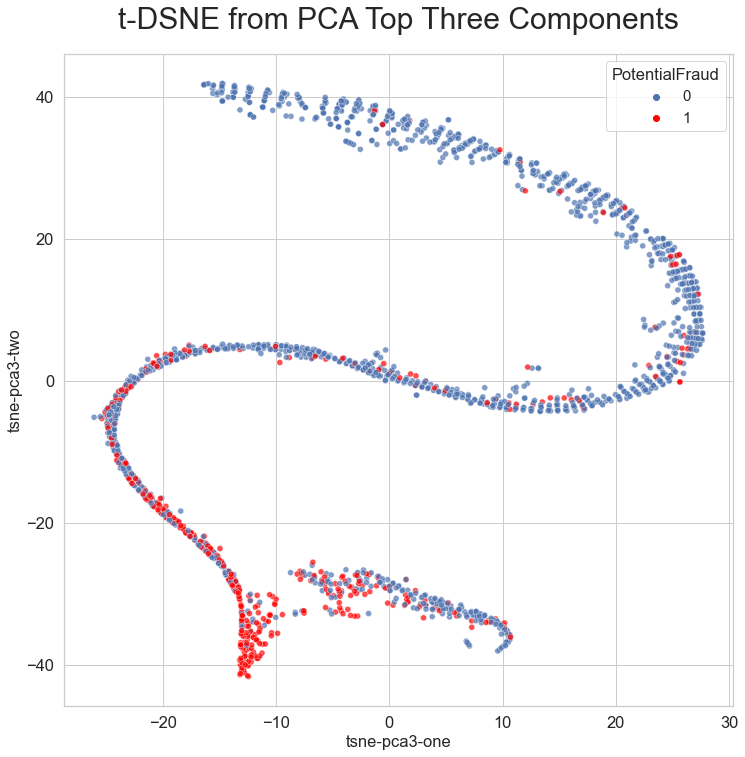

In [100]:
X_le['tsne-pca3-one'] = tsne_pca_results[:,0]
X_le['tsne-pca3-two'] = tsne_pca_results[:,1]

plt.figure(figsize=(12,12))
sns.scatterplot(
    x='tsne-pca3-one', y='tsne-pca3-two',
    hue=y_le,
    palette=['b','red'],
    #sns.color_palette("hls", 2),
    data=X_le,
    legend="full",
    alpha=0.7
)
plt.title('t-DSNE from PCA Top Three Components')

# K-means clustering
https://www.kaggle.com/fazilbtopal/popular-unsupervised-clustering-algorithms

## MORE EDA: plot actual data with Potential Fraud labeling

/Users/RK/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


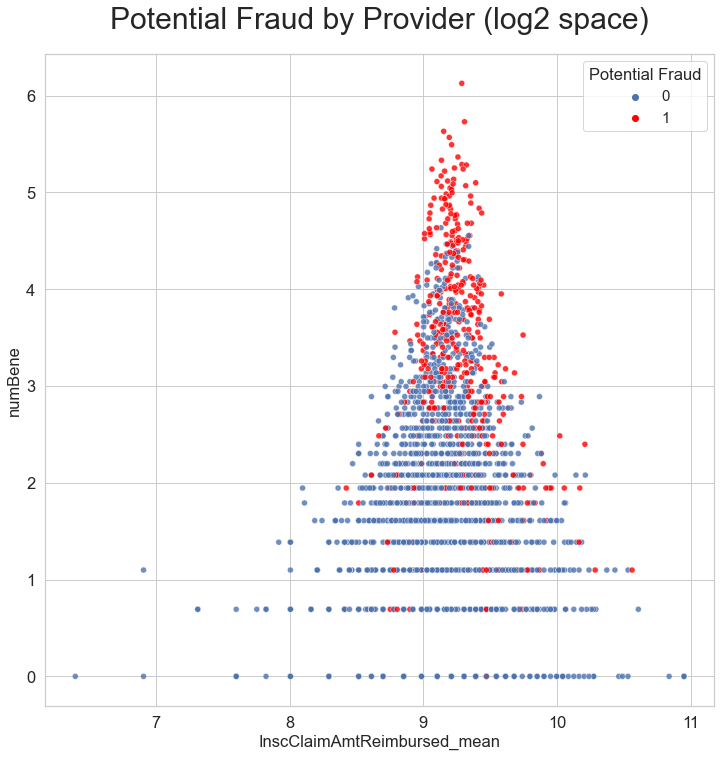

In [257]:
#plot actual data with Potential Fraud labeling

plt.figure(figsize=(12, 12))
sns.scatterplot(x=np.log(trIeng_df_undum['InscClaimAmtReimbursed_mean']), y=np.log(trIeng_df_undum['numBene']), 
                hue=trIeng_df_undum['PotentialFraud'], 
               palette=['b','red'], alpha=0.8)
plt.title('Potential Fraud by Provider (log2 space)')
plt.legend(title='Potential Fraud')
plt.show()


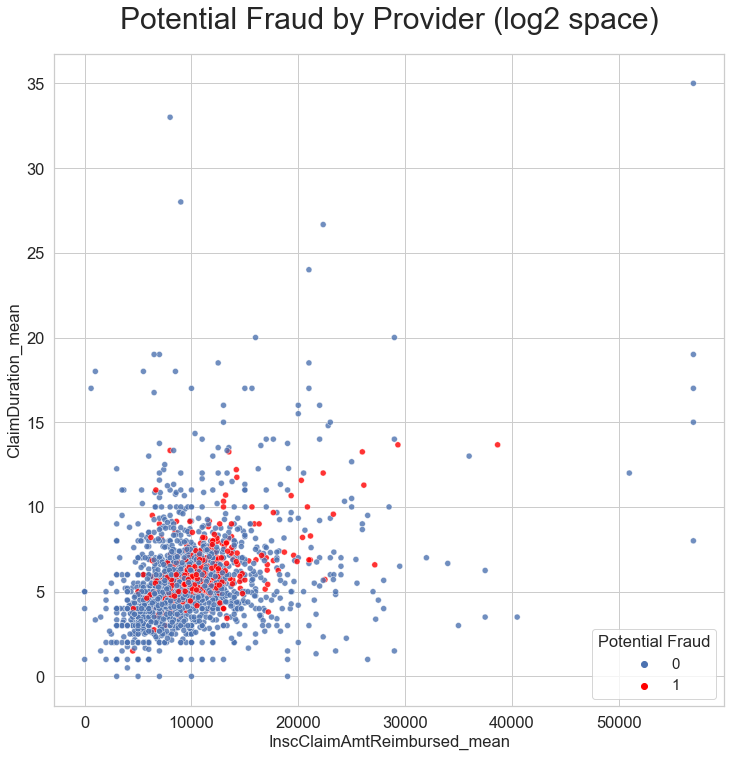

In [271]:
#plot actual data with Potential Fraud labeling

plt.figure(figsize=(12, 12))
sns.scatterplot(x=(trIeng_df_undum['InscClaimAmtReimbursed_mean']), y=(trIeng_df_undum['ClaimDuration_mean']), 
                hue=trIeng_df_undum['PotentialFraud'], 
               palette=['b','red'], alpha=0.8)
plt.title('Potential Fraud by Provider (log2 space)')
plt.legend(title='Potential Fraud')
plt.show()


Text(0, 0.5, 'Number of Beneficiaries')

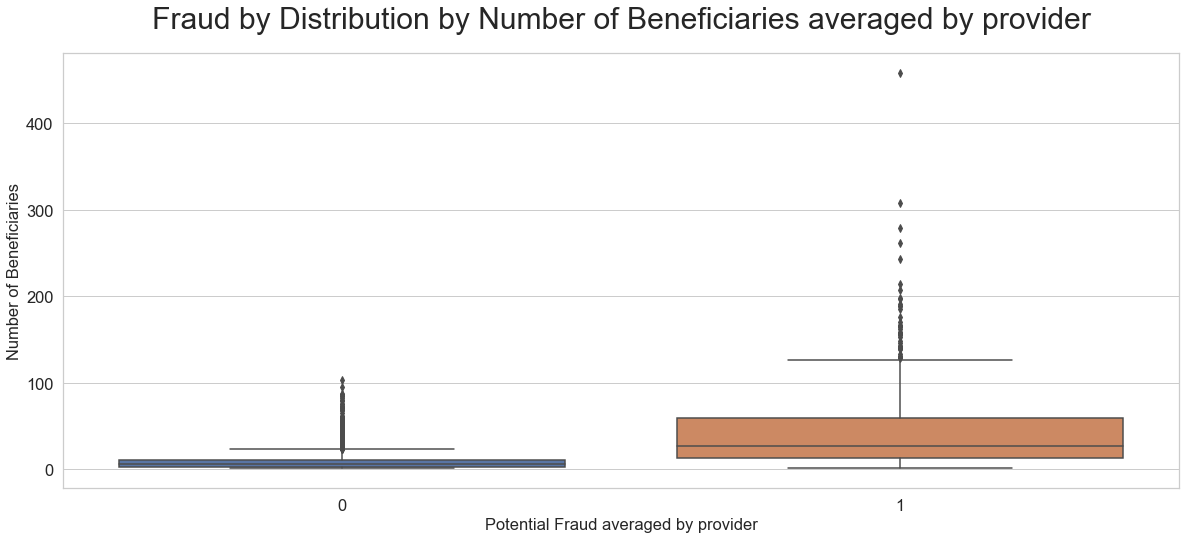

In [258]:
# Fraud relationship to numBene averaged by provider
sns.boxplot(data=trIeng_df_undum, x='PotentialFraud',y='numBene')
#plt.ylim(6000,8000)
plt.title('Fraud by Distribution by Number of Beneficiaries averaged by provider')
plt.xlabel('Potential Fraud averaged by provider')
plt.ylabel('Number of Beneficiaries')
#plt.legend()

Text(0, 0.5, 'Number of Claims')

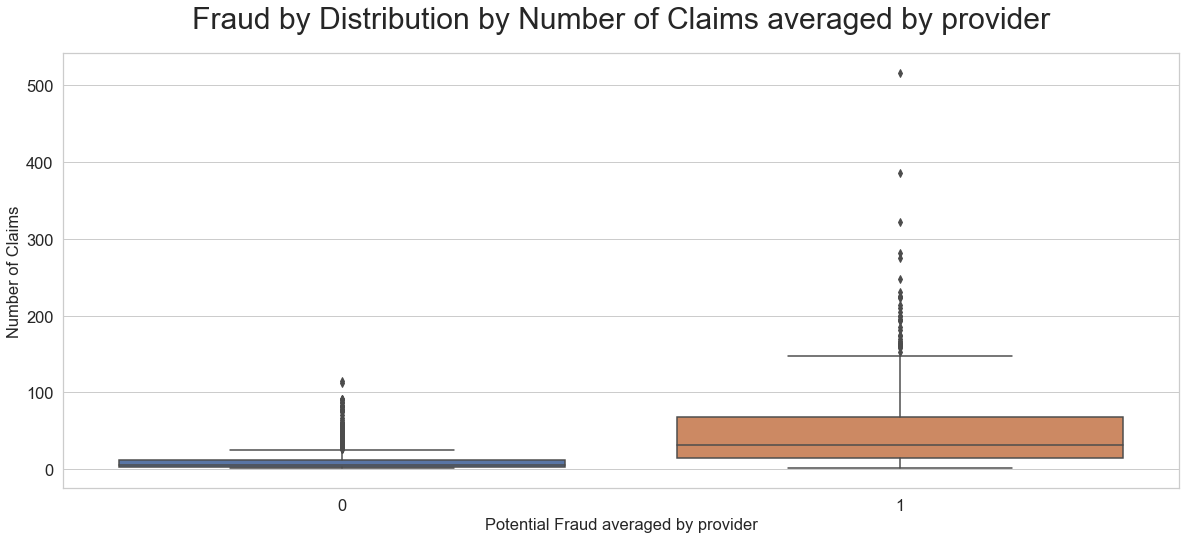

In [259]:
# Fraud relationship to numClaim averaged by provider
sns.boxplot(data=trIeng_df_undum, x='PotentialFraud',y='numClaim')
#plt.ylim(6000,8000)
plt.title('Fraud by Distribution by Number of Claims averaged by provider')
plt.xlabel('Potential Fraud averaged by provider')
plt.ylabel('Number of Claims')
#plt.legend()

In [7]:
# undummified label encoded version
y_le= trIeng_df_undum['PotentialFraud']
X_le=trIeng_df_undum.drop('PotentialFraud', axis=1)

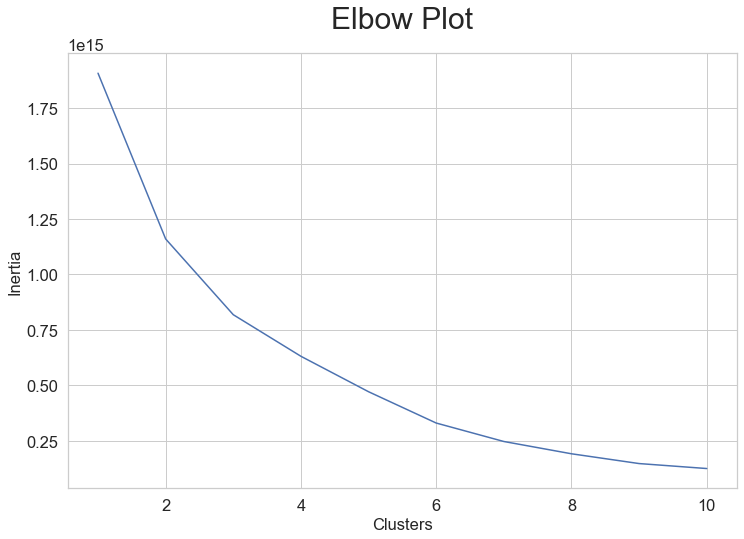

In [107]:
from sklearn.cluster import KMeans

clusters = []

for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(X_le)
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Elbow Plot')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

# Annotate arrow
ax.annotate('Possible Elbow Point', xy=(3, 140000), xytext=(3, 50000), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

ax.annotate('Possible Elbow Point', xy=(5, 80000), xytext=(5, 150000), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

plt.show()

### should be 2 clusters...

In [115]:
X_le

,AttendingPhysician_mode,OperatingPhysician_mode,OtherPhysician_mode,ClmAdmitDiagnosisCode_mode,DiagnosisGroupCode_mode,ClmDiagnosisCode_1_mode,ClmDiagnosisCode_2_mode,ClmDiagnosisCode_3_mode,ClmDiagnosisCode_4_mode,ClmDiagnosisCode_5_mode,ClmDiagnosisCode_6_mode,ClmDiagnosisCode_7_mode,ClmDiagnosisCode_8_mode,ClmDiagnosisCode_9_mode,ClmDiagnosisCode_10_mode,ClmProcedureCode_1_mode,ClmProcedureCode_2_mode,ClmProcedureCode_3_mode,ClmProcedureCode_4_mode,ClmProcedureCode_5_mode,numBene,numClaim,InscClaimAmtReimbursed_sum,InscClaimAmtReimbursed_mean,InscClaimAmtReimbursed_mad,ReimbPerDayAdmit_mean,ReimbPerDayAdmit_mad,ClaimStartDt_mean,ClaimStartDt_mad,AdmissionDt_mean,AdmissionDt_mad,DOD_mode,Gender_mean,Gender_mad,Race_mean,Race_mad,RenalDiseaseIndicator_mean,RenalDiseaseIndicator_mad,State_mode,County_mode,NoOfMonths_PartACov_mean,NoOfMonths_PartACov_mad,NoOfMonths_PartBCov_mean,NoOfMonths_PartBCov_mad,ChronicCond_Alzheimer_mean,ChronicCond_Alzheimer_mad,ChronicCond_Heartfailure_mean,ChronicCond_Heartfailure_mad,ChronicCond_KidneyDisease_mean,ChronicCond_KidneyDisease_mad,ChronicCond_Cancer_mean,ChronicCond_Cancer_mad,ChronicCond_ObstrPulmonary_mean,ChronicCond_ObstrPulmonary_mad,ChronicCond_Depression_mean,ChronicCond_Depression_mad,ChronicCond_Diabetes_mean,ChronicCond_Diabetes_mad,ChronicCond_IschemicHeart_mean,ChronicCond_IschemicHeart_mad,ChronicCond_Osteoporasis_mean,ChronicCond_Osteoporasis_mad,ChronicCond_rheumatoidarthritis_mean,ChronicCond_rheumatoidarthritis_mad,ChronicCond_stroke_mean,ChronicCond_stroke_mad,IPAnnualReimbursementAmt_mean,IPAnnualReimbursementAmt_mad,IPAnnualDeductibleAmt_mean,IPAnnualDeductibleAmt_mad,numChronic_mean,numChronic_mad,Age_mean,Age_mad,ClaimDuration_mean,ClaimDuration_mad,AdmitDays_mean,AdmitDays_mad,numPhysicians_mean,numPhysicians_mad,numDiagCodes_mean,numDiagCodes_mad,numProcCodes_mean,numProcCodes_mad,ClmAdmitDiagnosisCode_uniq,DiagnosisGroupCode_uniq,ClmDiagnosisCodes_uniq,ClmProcedureCodes_uniq
0,1196,0,0,70,531,115,99,109,456,9,58,348,307,260,33,279,67,23,7,0,5,5,97000,19400.000000,15680.000000,803718.883563,1.278512e+06,104.600000,55.280000,104.600000,55.280000,0,1.600000,0.480000,1.000000,0.000000,0.400000,0.480000,1,160,12.000000,0.000000,12.000000,0.000000,0.400000,0.480000,0.800000,0.320000,0.800000,0.320000,0.200000,0.320000,0.400000,0.480000,0.800000,0.320000,0.800000,0.320000,0.800000,0.320000,0.000000,0.000000,0.600000,0.480000,0.400000,0.480000,77902.000000,46721.600000,2563.200000,1367.040000,6.000000,2.000000,78.200000,7.840000,5.000000,3.600000,5.000000,3.600000,1.600000,0.720000,7.200000,1.040000,0.600000,0.720000,5,5,34,3
1,876,0,0,313,121,250,149,356,145,56,379,348,307,260,33,210,22,23,7,0,53,62,573000,9241.935484,5143.080125,3329.664234,2.887644e+03,163.758065,90.016129,163.758065,90.016129,0,1.661290,0.447971,1.209677,0.331426,0.274194,0.398023,1,340,11.806452,0.380853,11.806452,0.380853,0.516129,0.499480,0.580645,0.486993,0.629032,0.466701,0.112903,0.200312,0.370968,0.466701,0.403226,0.481270,0.790323,0.331426,0.887097,0.200312,0.209677,0.331426,0.306452,0.425078,0.112903,0.200312,12696.612903,6963.267430,1604.064516,706.926119,4.919355,1.832986,70.387097,11.602497,5.161290,3.046826,5.161290,3.046826,1.645161,0.457856,8.112903,1.388137,0.774194,0.574402,46,58,271,39
2,804,0,0,296,57,131,36,169,95,176,249,386,307,260,33,212,67,23,7,0,3,3,19000,6333.333333,2444.444444,1309.245129,5.871566e+02,151.000000,53.333333,151.000000,53.333333,0,1.666667,0.444444,1.000000,0.000000,0.333333,0.444444,1,460,12.000000,0.000000,12.000000,0.000000,0.666667,0.444444,1.000000,0.000000,0.333333,0.444444,0.000000,0.000000,0.000000,0.000000,0.666667,0.444444,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.333333,0.444444,0.666667,0.444444,11710.000000,3726.666667,2136.000000,712.000000,5.666667,0.444444,78.333333,3.555556,5.333333,1.111111,5.333333,1.111111,1.333333,0.444444,7.333333,1.111111,0.333333,0.444444,3,3,22,1
3,1823,22,0,304,414,77,209,407,476,146,64,237,23,22,33,23

### 2 clusters

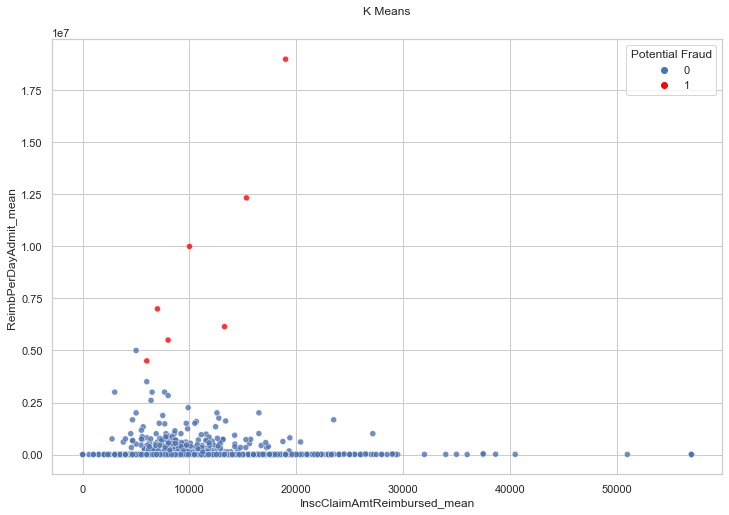

In [9]:
# 2 clusters
km3 = KMeans(n_clusters=2).fit(X_le)

X_le['Labels'] = km3.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(x=X_le['InscClaimAmtReimbursed_mean'], y=X_le['ReimbPerDayAdmit_mean'], hue=X_le['Labels'], 
               palette=['b','red'], alpha=0.8)
plt.title('K Means')
plt.legend(title='Potential Fraud')
plt.show()

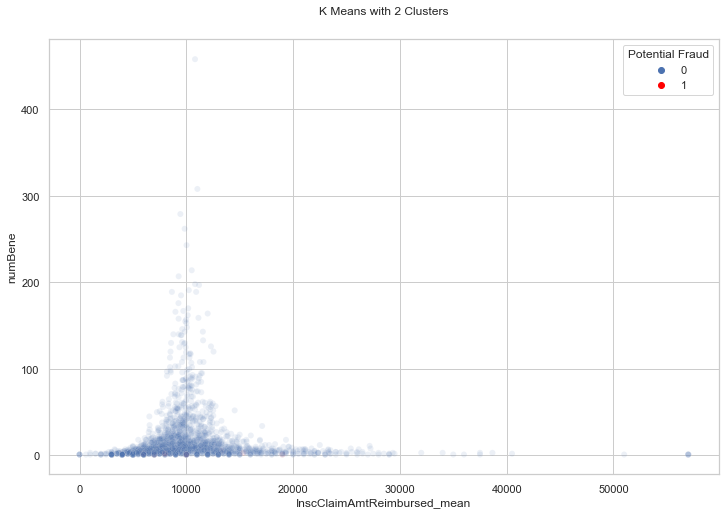

In [11]:
# 2 clusters
km3 = KMeans(n_clusters=2).fit(X_le)

X_le['Labels'] = km3.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(x=X_le['InscClaimAmtReimbursed_mean'], y=X_le['numBene'], hue=X_le['Labels'], 
               palette=['b','red'], alpha=0.1)
plt.title('K Means with 2 Clusters')
plt.legend(title='Potential Fraud')
plt.show()

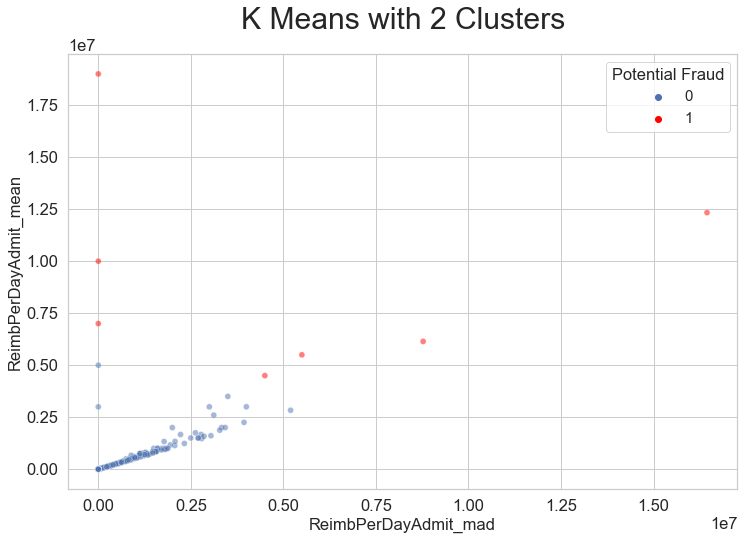

In [147]:
# 2 clusters
km3 = KMeans(n_clusters=2).fit(X_le)

X_le['Labels'] = km3.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(x=X_le['ReimbPerDayAdmit_mad'], y=X_le['ReimbPerDayAdmit_mean'], hue=X_le['Labels'], 
               palette=['b','red'], alpha=0.5)
plt.title('K Means with 2 Clusters')
plt.legend(title='Potential Fraud')
plt.show()

# Repeat K-Means clustering using PCA output top 3 components

In [14]:
# undummified label encoded version
y_le= trIeng_df_undum['PotentialFraud']
X_le=trIeng_df_undum.drop('PotentialFraud', axis=1)

pca_3 = PCA(n_components=3)
pca_result_3 = pca_3.fit_transform(X_le)
print('Cumulative explained variation for 3 principal components: {}'.format(np.sum(pca_3.explained_variance_ratio_)))

Cumulative explained variation for 3 principal components: 0.9998069401670553


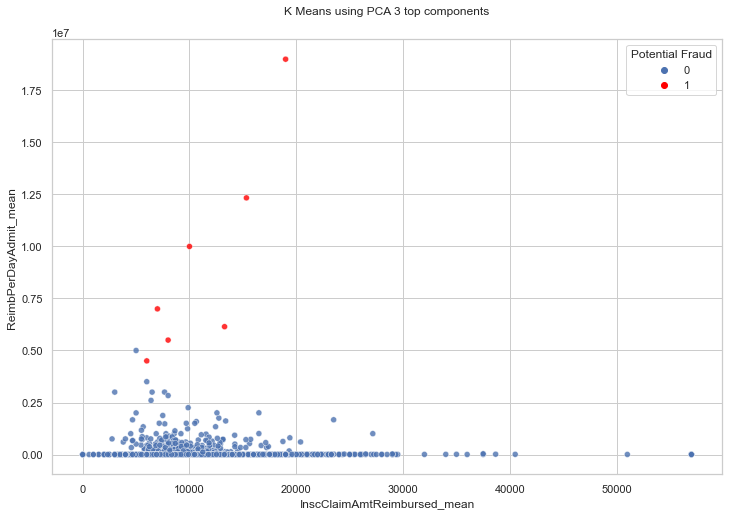

In [15]:
# 2 clusters
km2 = KMeans(n_clusters=2).fit(pca_result_3)

X_le['Labels'] = km2.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(x=X_le['InscClaimAmtReimbursed_mean'], y=X_le['ReimbPerDayAdmit_mean'], hue=X_le['Labels'], 
               palette=['b','red'], alpha=0.8)
plt.title('K Means using PCA 3 top components')
plt.legend(title='Potential Fraud')
plt.show()

## Nearly same result with PCA as without

# Hierarchical Clustering

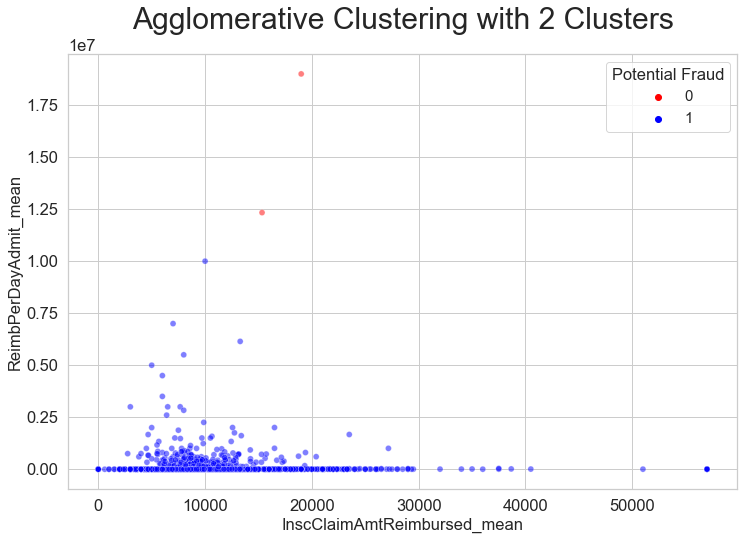

In [180]:
from sklearn.cluster import AgglomerativeClustering 

agglom = AgglomerativeClustering(n_clusters=2, linkage='average').fit(X_le)

X_le['Labels'] = agglom.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(x=X_le['InscClaimAmtReimbursed_mean'], y=X_le['ReimbPerDayAdmit_mean'], hue=X_le['Labels'], 
               palette=['red','blue'], alpha=0.5)
plt.title('Agglomerative Clustering with 2 Clusters')
plt.legend(title='Potential Fraud')
plt.show()

# Density Based Clustering (DBSCAN) .... performs poorly does not identify 2 clusters

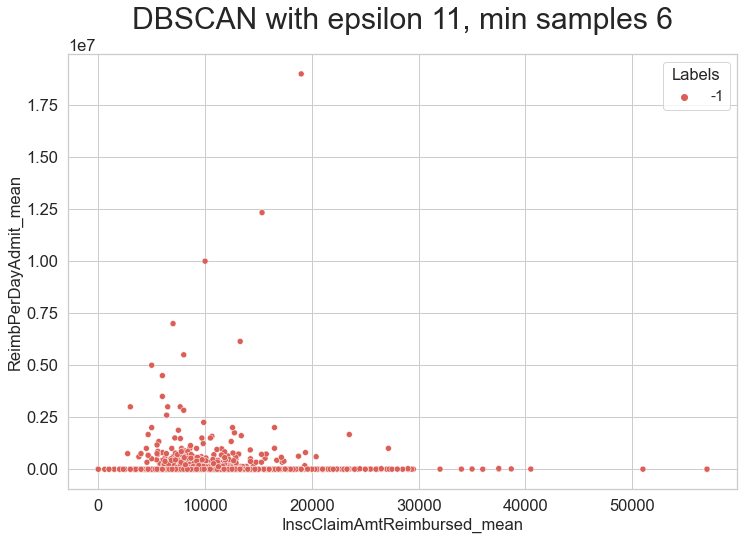

In [174]:
from sklearn.cluster import DBSCAN 

db = DBSCAN(eps=11, min_samples=2).fit(X_le)

X_le['Labels'] = db.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(x=X_le['InscClaimAmtReimbursed_mean'], y=X_le['ReimbPerDayAdmit_mean'], hue=X_le['Labels'],
                palette=sns.color_palette('hls', np.unique(db.labels_).shape[0]))
plt.title('DBSCAN with epsilon 11, min samples 6')
plt.show()

NameError: name 'c1' is not defined

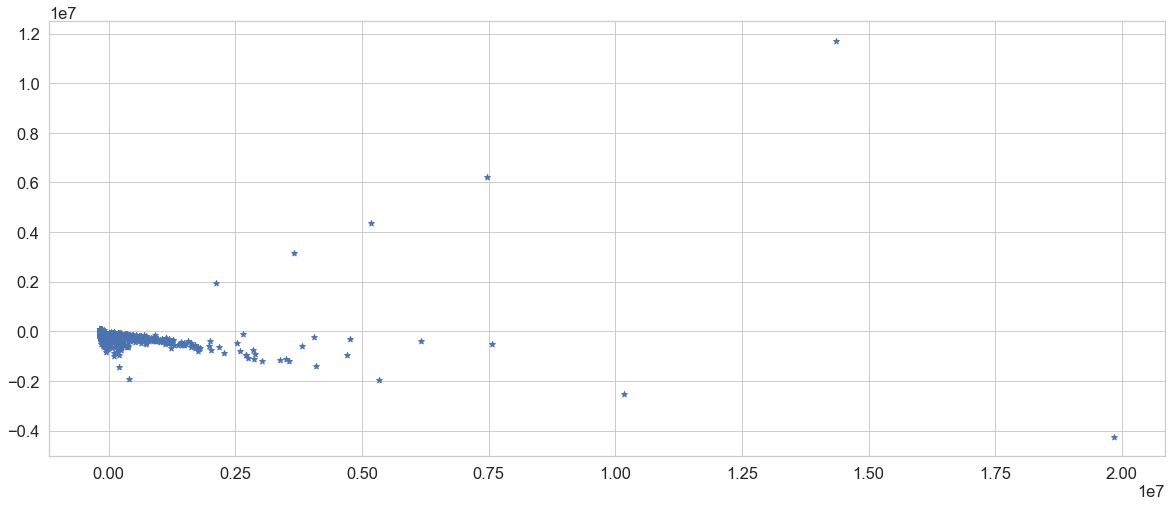

In [197]:
# from https://builtin.com/data-science/unsupervised-learning-python

# Declaring Model
dbscan = DBSCAN()

# Fitting
dbscan.fit(X_le)

# Transoring Using PCA
pca = PCA(n_components=2).fit(X_le)
pca_2d = pca.transform(X_le)

# Plot based on Class
for i in range(0, pca_2d.shape[0]):
    if dbscan.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='r', marker='+')
    elif dbscan.labels_[i] == 1:
        c2 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='g', marker='o')
    elif dbscan.labels_[i] == -1:
        c3 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='b', marker='*')

plt.legend([c1, c2, c3], ['Cluster 1', 'Cluster 2', 'Noise'])
plt.title('DBSCAN finds 2 clusters and Noise')
plt.show()

# Gaussian Mixture with soft labeling
https://towardsdatascience.com/clustering-based-unsupervised-learning-8d705298ae51

In [222]:
# undummified label encoded version
y_le= trIeng_df_undum['PotentialFraud']
X_le=trIeng_df_undum.drop('PotentialFraud', axis=1)

Text(0.5, 0.92, 'Gaussian Mixture Model')

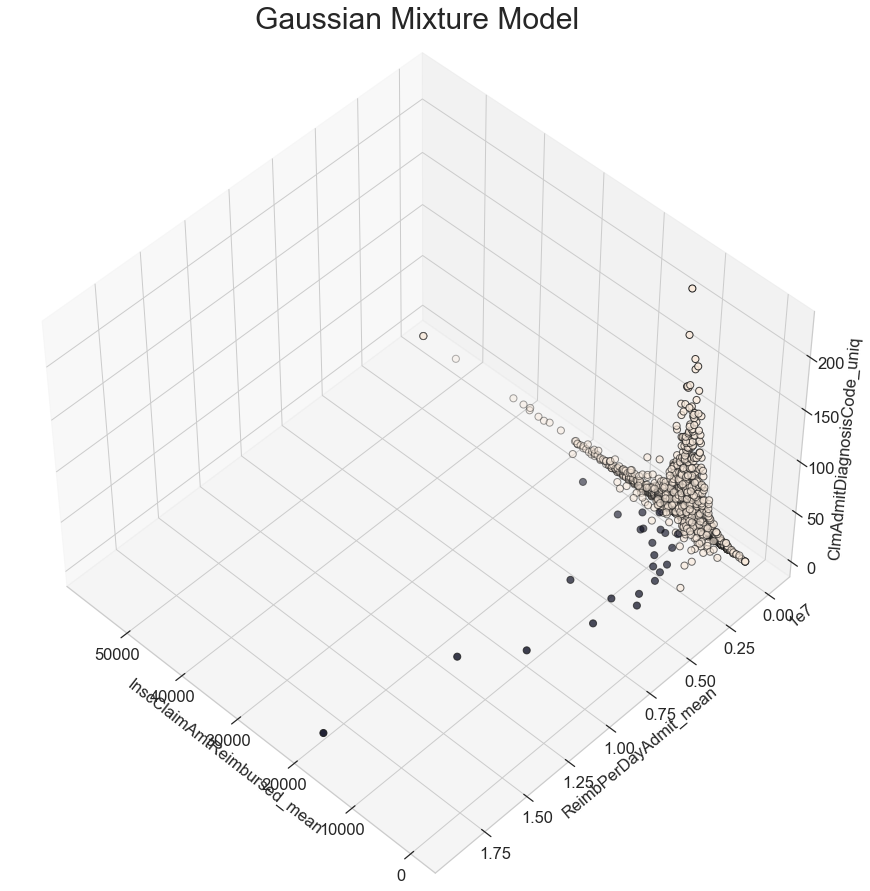

In [190]:
from sklearn.mixture import GaussianMixture

#Gaussian Mixture Model
gmm = GaussianMixture(n_components=2)
gmm.fit(X_le)
proba_lists = gmm.predict(X_le)
#Plotting
colored_arrays = np.matrix(proba_lists)
colored_tuples = [tuple(i.tolist()[0]) for i in colored_arrays]
fig = plt.figure(1, figsize=(12,12))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
ax.scatter(X_le['InscClaimAmtReimbursed_mean'], X_le['ReimbPerDayAdmit_mean'], X_le['ClmAdmitDiagnosisCode_uniq'],
          c=colored_tuples, edgecolor="k", s=50)
ax.set_xlabel("InscClaimAmtReimbursed_mean")
ax.set_ylabel("ReimbPerDayAdmit_mean")
ax.set_zlabel("ClmAdmitDiagnosisCode_uniq")
plt.title("Gaussian Mixture Model")


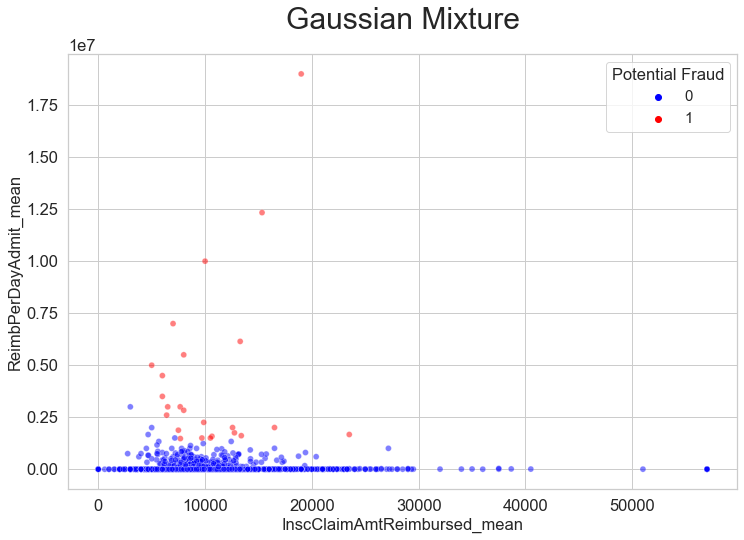

In [224]:
from sklearn.mixture import GaussianMixture

#Gaussian Mixture Model
gmm = GaussianMixture(n_components=2)
gmm.fit(X_le)
X_le['Labels'] = gmm.predict(X_le)
plt.figure(figsize=(12, 8))
sns.scatterplot(x=X_le['InscClaimAmtReimbursed_mean'], y=X_le['ReimbPerDayAdmit_mean'], hue=np.logical_not(X_le['Labels']).astype(int), # invert labels 
               palette=['blue','red'], alpha=0.5)
plt.title('Gaussian Mixture')
plt.legend(title='Potential Fraud')
plt.show()

# One Class SVM

In [217]:
X_le

,AttendingPhysician_mode,OperatingPhysician_mode,OtherPhysician_mode,ClmAdmitDiagnosisCode_mode,DiagnosisGroupCode_mode,ClmDiagnosisCode_1_mode,ClmDiagnosisCode_2_mode,ClmDiagnosisCode_3_mode,ClmDiagnosisCode_4_mode,ClmDiagnosisCode_5_mode,ClmDiagnosisCode_6_mode,ClmDiagnosisCode_7_mode,ClmDiagnosisCode_8_mode,ClmDiagnosisCode_9_mode,ClmDiagnosisCode_10_mode,ClmProcedureCode_1_mode,ClmProcedureCode_2_mode,ClmProcedureCode_3_mode,ClmProcedureCode_4_mode,ClmProcedureCode_5_mode,numBene,numClaim,InscClaimAmtReimbursed_sum,InscClaimAmtReimbursed_mean,InscClaimAmtReimbursed_mad,ReimbPerDayAdmit_mean,ReimbPerDayAdmit_mad,ClaimStartDt_mean,ClaimStartDt_mad,AdmissionDt_mean,AdmissionDt_mad,DOD_mode,Gender_mean,Gender_mad,Race_mean,Race_mad,RenalDiseaseIndicator_mean,RenalDiseaseIndicator_mad,State_mode,County_mode,NoOfMonths_PartACov_mean,NoOfMonths_PartACov_mad,NoOfMonths_PartBCov_mean,NoOfMonths_PartBCov_mad,ChronicCond_Alzheimer_mean,ChronicCond_Alzheimer_mad,ChronicCond_Heartfailure_mean,ChronicCond_Heartfailure_mad,ChronicCond_KidneyDisease_mean,ChronicCond_KidneyDisease_mad,ChronicCond_Cancer_mean,ChronicCond_Cancer_mad,ChronicCond_ObstrPulmonary_mean,ChronicCond_ObstrPulmonary_mad,ChronicCond_Depression_mean,ChronicCond_Depression_mad,ChronicCond_Diabetes_mean,ChronicCond_Diabetes_mad,ChronicCond_IschemicHeart_mean,ChronicCond_IschemicHeart_mad,ChronicCond_Osteoporasis_mean,ChronicCond_Osteoporasis_mad,ChronicCond_rheumatoidarthritis_mean,ChronicCond_rheumatoidarthritis_mad,ChronicCond_stroke_mean,ChronicCond_stroke_mad,IPAnnualReimbursementAmt_mean,IPAnnualReimbursementAmt_mad,IPAnnualDeductibleAmt_mean,IPAnnualDeductibleAmt_mad,numChronic_mean,numChronic_mad,Age_mean,Age_mad,ClaimDuration_mean,ClaimDuration_mad,AdmitDays_mean,AdmitDays_mad,numPhysicians_mean,numPhysicians_mad,numDiagCodes_mean,numDiagCodes_mad,numProcCodes_mean,numProcCodes_mad,ClmAdmitDiagnosisCode_uniq,DiagnosisGroupCode_uniq,ClmDiagnosisCodes_uniq,ClmProcedureCodes_uniq
0,1196,0,0,70,531,115,99,109,456,9,58,348,307,260,33,279,67,23,7,0,5,5,97000,19400.000000,15680.000000,803718.883563,1.278512e+06,104.600000,55.280000,104.600000,55.280000,0,1.600000,0.480000,1.000000,0.000000,0.400000,0.480000,1,160,12.000000,0.000000,12.000000,0.000000,0.400000,0.480000,0.800000,0.320000,0.800000,0.320000,0.200000,0.320000,0.400000,0.480000,0.800000,0.320000,0.800000,0.320000,0.800000,0.320000,0.000000,0.000000,0.600000,0.480000,0.400000,0.480000,77902.000000,46721.600000,2563.200000,1367.040000,6.000000,2.000000,78.200000,7.840000,5.000000,3.600000,5.000000,3.600000,1.600000,0.720000,7.200000,1.040000,0.600000,0.720000,5,5,34,3
1,876,0,0,313,121,250,149,356,145,56,379,348,307,260,33,210,22,23,7,0,53,62,573000,9241.935484,5143.080125,3329.664234,2.887644e+03,163.758065,90.016129,163.758065,90.016129,0,1.661290,0.447971,1.209677,0.331426,0.274194,0.398023,1,340,11.806452,0.380853,11.806452,0.380853,0.516129,0.499480,0.580645,0.486993,0.629032,0.466701,0.112903,0.200312,0.370968,0.466701,0.403226,0.481270,0.790323,0.331426,0.887097,0.200312,0.209677,0.331426,0.306452,0.425078,0.112903,0.200312,12696.612903,6963.267430,1604.064516,706.926119,4.919355,1.832986,70.387097,11.602497,5.161290,3.046826,5.161290,3.046826,1.645161,0.457856,8.112903,1.388137,0.774194,0.574402,46,58,271,39
2,804,0,0,296,57,131,36,169,95,176,249,386,307,260,33,212,67,23,7,0,3,3,19000,6333.333333,2444.444444,1309.245129,5.871566e+02,151.000000,53.333333,151.000000,53.333333,0,1.666667,0.444444,1.000000,0.000000,0.333333,0.444444,1,460,12.000000,0.000000,12.000000,0.000000,0.666667,0.444444,1.000000,0.000000,0.333333,0.444444,0.000000,0.000000,0.000000,0.000000,0.666667,0.444444,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.333333,0.444444,0.666667,0.444444,11710.000000,3726.666667,2136.000000,712.000000,5.666667,0.444444,78.333333,3.555556,5.333333,1.111111,5.333333,1.111111,1.333333,0.444444,7.333333,1.111111,0.333333,0.444444,3,3,22,1
3,1823,22,0,304,414,77,209,407,476,146,64,237,23,22,33,23